In [4]:
import pandas as pd
import numpy as np
import sys
import time  # Optional, for demonstration purposes


# Define chunk size (adjust based on memory availability)
chunk_size = 250000
know_df_size = "2,263,154"  # This is just a label for display

# Track the number of processed rows and store chunks
processed_rows = 0
chunks = []

# Process CSV in chunks
for chunk in pd.read_csv("Letor_train_fold5.csv", chunksize=chunk_size, low_memory=False):
    # Replace '?' with NaN for proper missing value handling
    chunk.replace("?", np.nan, inplace=True)
    
    # Update the processed rows counter
    processed_rows += len(chunk)
    
    # Append this chunk to the list
    chunks.append(chunk)
    
    # Print the progress on the same line
    sys.stdout.write(f"\rProcessed {processed_rows:,} rows out of {know_df_size} ...")
    sys.stdout.flush()

# New line after finishing
print()

# Combine all chunks into a full DataFrame (if needed)
train_df = pd.concat(chunks, ignore_index=True)

# Check the final DataFrame shape
print("Final Data Shape:", df_train.shape)


Processed 2,263,154 rows out of 2,263,154 ...
Final Data Shape: (2263154, 138)


In [5]:
import pandas as pd
import numpy as np
import sys
import time  # Optional, for demonstration purposes


# Define chunk size (adjust based on memory availability)
chunk_size = 250000
know_df_size = "760,753"  # This is just a label for display

# Track the number of processed rows and store chunks
processed_rows = 0
chunks = []

# Process CSV in chunks
for chunk in pd.read_csv("Letor_vali_fold5.csv", chunksize=chunk_size, low_memory=False):
    # Replace '?' with NaN for proper missing value handling
    chunk.replace("?", np.nan, inplace=True)
    
    # Update the processed rows counter
    processed_rows += len(chunk)
    
    # Append this chunk to the list
    chunks.append(chunk)
    
    # Print the progress on the same line
    sys.stdout.write(f"\rProcessed {processed_rows:,} rows out of {know_df_size} ...")
    sys.stdout.flush()

# New line after finishing
print()

# Combine all chunks into a full DataFrame (if needed)
vali_df = pd.concat(chunks, ignore_index=True)

# Check the final DataFrame shape
print("Final Data Shape:", df_vali.shape)


Processed 760,753 rows out of 760,753 ...
Final Data Shape: (760753, 138)


In [6]:
import pandas as pd
import numpy as np
import sys
import time  # Optional, for demonstration purposes


# Define chunk size (adjust based on memory availability)
chunk_size = 250000
know_df_size = "760,753"  # This is just a label for display

# Track the number of processed rows and store chunks
processed_rows = 0
chunks = []

# Process CSV in chunks
for chunk in pd.read_csv("Letor_test_fold5.csv", chunksize=chunk_size, low_memory=False):
    # Replace '?' with NaN for proper missing value handling
    chunk.replace("?", np.nan, inplace=True)
    
    # Update the processed rows counter
    processed_rows += len(chunk)
    
    # Append this chunk to the list
    chunks.append(chunk)
    
    # Print the progress on the same line
    sys.stdout.write(f"\rProcessed {processed_rows:,} rows out of {know_df_size} ...")
    sys.stdout.flush()

# New line after finishing
print()

# Combine all chunks into a full DataFrame (if needed)
test_df = pd.concat(chunks, ignore_index=True)

# Check the final DataFrame shape
print("Final Data Shape:", df_test.shape)


Processed 747,218 rows out of 760,753 ...
Final Data Shape: (747218, 138)


In [7]:
# Display DataFrame info
print(train_df.info())

# Show first few rows
print(train_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263154 entries, 0 to 2263153
Columns: 138 entries, relevance to feature_136
dtypes: float64(136), int64(2)
memory usage: 2.3 GB
None
   relevance  query_id  feature_1  feature_2  feature_3  feature_4  feature_5  \
0          2         5        2.0        0.0        2.0        0.0        2.0   
1          1         5        2.0        1.0        2.0        0.0        2.0   
2          1         5        2.0        0.0        2.0        0.0        2.0   
3          0         5        0.0        0.0        0.0        2.0        2.0   
4          0         5        2.0        0.0        2.0        0.0        2.0   

   feature_6  feature_7  feature_8  ...  feature_127  feature_128  \
0        1.0        0.0        1.0  ...         34.0          0.0   
1        1.0        0.5        1.0  ...         48.0   11089534.0   
2        1.0        0.0        1.0  ...         43.0   11089534.0   
3        0.0        0.0        0.0  ...         24.0 

In [8]:
# Display DataFrame validation info
print(vali_df.info())

# Display DataFrame test info
print(test_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760753 entries, 0 to 760752
Columns: 138 entries, relevance to feature_136
dtypes: float64(136), int64(2)
memory usage: 801.0 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747218 entries, 0 to 747217
Columns: 138 entries, relevance to feature_136
dtypes: float64(136), int64(2)
memory usage: 786.7 MB
None


In [9]:
# If relevance is numeric in nature, convert it to int (or float)
train_df["relevance"] = train_df["relevance"].astype(int)
vali_df["relevance"] = vali_df["relevance"].astype(int)
test_df["relevance"] = test_df["relevance"].astype(int)


# Display DataFrame info
print(train_df.info())
print(vali_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263154 entries, 0 to 2263153
Columns: 138 entries, relevance to feature_136
dtypes: float64(136), int64(2)
memory usage: 2.3 GB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760753 entries, 0 to 760752
Columns: 138 entries, relevance to feature_136
dtypes: float64(136), int64(2)
memory usage: 801.0 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747218 entries, 0 to 747217
Columns: 138 entries, relevance to feature_136
dtypes: float64(136), int64(2)
memory usage: 786.7 MB
None


In [10]:
# --- Concatenate Training and Validation Data ---
# Assume train_df and vali_df are already processed and available.
train_val_df = pd.concat([train_df, vali_df], ignore_index=True)

# --- Extract the target variable and features ---
# For the combined training set, extract "relevance" as the target (y_train)
y_train = train_val_df["relevance"]

# Create the feature matrix X_train by dropping the "relevance" column
X_train = train_val_df.drop(columns=["relevance"])

# For the test set, do the same:
y_test = test_df["relevance"]
X_test = test_df.drop(columns=["relevance"])

# --- Compute Group Sizes for Ranking ---
# Each group is the number of rows for each query (based on "query_id")
group_train = X_train.groupby("query_id").size().tolist()
group_test = X_test.groupby("query_id").size().tolist()

# --- Print Shapes and Group Information ---
print("Combined Training Data (Train + Validation):")
print("X_train shape:", X_train.shape)
print("y_train length:", len(y_train))

print("\nTest Data:")
print("X_test shape:", X_test.shape)
print("y_test length:", len(y_test))


Combined Training Data (Train + Validation):
X_train shape: (3023907, 137)
y_train length: 3023907

Test Data:
X_test shape: (747218, 137)
y_test length: 747218


In [26]:
import lightgbm as lgb
import time

# Define LightGBM Parameters for Ranking
params_with_efb = {
    'objective': 'lambdarank',   # Use ranking objective
    'metric': 'ndcg',            # Evaluate using NDCG metric
    'verbose': 1,
    'data_sample_strategy': 'goss',  # Keep GOSS if desired
    'top_rate': 0.1,
    'other_rate': 0.1,
    'force_row_wise': True,
    'enable_bundle': True,
    'ndcg_eval_at': 10
}

# Assume that X_train, y_train, X_test, y_test are defined,
# and group_train and group_test are computed as the list of query group sizes.
#
# For example, if your training DataFrame 'train_df' has a 'query_id' column,
# you can compute group_train like this:
#
# group_train = train_df.groupby('query_id').size().tolist()
#
# Do the same for test_df to get group_test.

# Create LightGBM Datasets with group information
train_data_with_efb = lgb.Dataset(X_train, label=y_train, group=group_train, 
                                  params={'enable_bundle': True, 'max_bin': 128})
valid_data_with_efb = lgb.Dataset(X_test, label=y_test, group=group_test, 
                                  params={'enable_bundle': True, 'max_bin': 128})

print("Training LightGBM Ranking Model with EFB Enabled...")
start_time_with_efb = time.time()

# Dictionary to store evaluation results
evals_result_with_efb = {}

# Train the ranking model
model_with_efb = lgb.train(
    params_with_efb,
    train_data_with_efb,
    valid_sets=[valid_data_with_efb],
    valid_names=['validation'],
    num_boost_round=350,
    callbacks=[
        lgb.record_evaluation(evals_result_with_efb),
        lgb.early_stopping(stopping_rounds=20, verbose=True)
    ]
)

training_time_with_efb = time.time() - start_time_with_efb
best_iter_with_efb = model_with_efb.best_iteration

print(f"\nLightGBM Ranking Model with EFB Enabled Training Complete. Best Iteration: {best_iter_with_efb}")
print(f"Training Time: {training_time_with_efb:.4f} seconds")


Training LightGBM Ranking Model with EFB Enabled...
[LightGBM] [Info] Total Bins 14026
[LightGBM] [Info] Number of data points in the train set: 3023907, number of used features: 137
[LightGBM] [Info] Using GOSS
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[347]	validation's ndcg@10: 0.515086

LightGBM Ranking Model with EFB Enabled Training Complete. Best Iteration: 347
Training Time: 128.4952 seconds


In [12]:
import lightgbm as lgb
import time

# Define LightGBM Parameters for Ranking (EFB Disabled)
params_without_efb = {
    'objective': 'lambdarank',        # Ranking objective
    'metric': 'ndcg',                 # Use NDCG as evaluation metric             # Evaluate at 10 (ndcg@10)
    'verbose': 1,
    'ndcg_eval_at': 10,
    'force_row_wise': True
    # No GOSS or bundling parameters are set here:
    # (EFB is disabled by not enabling it, and we are not using data_sample_strategy here)
}

# Create LightGBM Datasets with group information for ranking.
# (group_train and group_test must be lists of query group sizes.)
train_data_without_efb = lgb.Dataset(X_train, label=y_train, group=group_train, 
                                     params={'enable_bundle': False, 'max_bin': 128})
valid_data_without_efb = lgb.Dataset(X_test, label=y_test, group=group_test, 
                                     params={'enable_bundle': False, 'max_bin': 128})

print("Training LightGBM Ranking Model with EFB Disabled...")
start_time_without_efb = time.time()

# Dictionary to store evaluation results
evals_result_without_efb = {}

# Train the ranking model
model_without_efb = lgb.train(
    params_without_efb,
    train_data_without_efb,
    valid_sets=[valid_data_without_efb],
    valid_names=['validation'],
    num_boost_round=100,
    callbacks=[
        lgb.record_evaluation(evals_result_without_efb),
        lgb.early_stopping(stopping_rounds=20, verbose=True)
    ]
)

training_time_without_efb = time.time() - start_time_without_efb
best_iter_without_efb = model_without_efb.best_iteration

print(f"\nLightGBM Ranking Model with EFB Disabled Training Complete. Best Iteration: {best_iter_without_efb}")
print(f"Training Time: {training_time_without_efb:.4f} seconds")


Training LightGBM Ranking Model with EFB Disabled...
[LightGBM] [Info] Total Bins 14026
[LightGBM] [Info] Number of data points in the train set: 3023907, number of used features: 137
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[100]	validation's ndcg@10: 0.505895

LightGBM Ranking Model with EFB Disabled Training Complete. Best Iteration: 100
Training Time: 89.4345 seconds


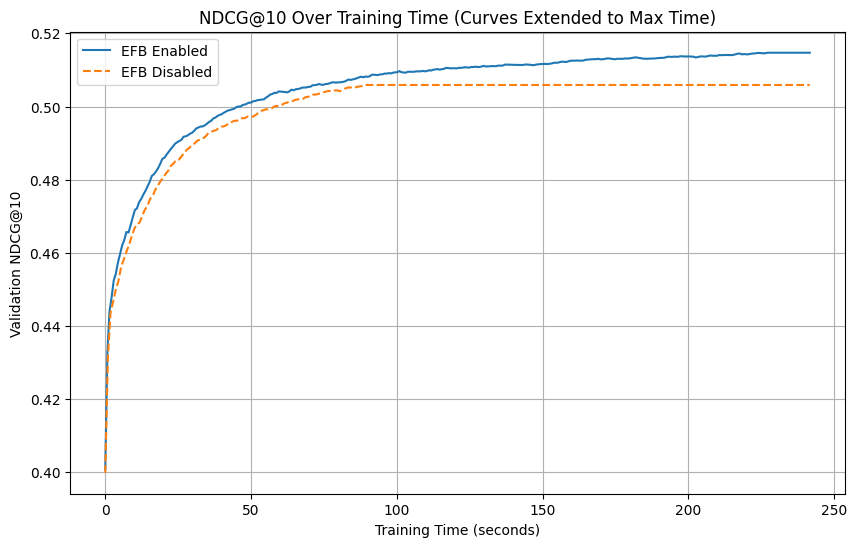

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Extract NDCG@10 values from evaluation results
# (Make sure your training was run with ndcg_eval_at = [10] so that the key is "ndcg@10")
ndcg_with_efb = np.array(evals_result_with_efb['validation']['ndcg@10'])
ndcg_without_efb = np.array(evals_result_without_efb['validation']['ndcg@10'])

# Generate time arrays for each model (assumes training time is known)
time_with_efb = np.linspace(0, training_time_with_efb, len(ndcg_with_efb))
time_without_efb = np.linspace(0, training_time_without_efb, len(ndcg_without_efb))

# Identify the peak (best) NDCG index and corresponding time for each model
peak_idx_with = np.argmax(ndcg_with_efb)
peak_idx_without = np.argmax(ndcg_without_efb)

peak_time_with = time_with_efb[peak_idx_with]
peak_time_without = time_without_efb[peak_idx_without]

peak_ndcg_with = ndcg_with_efb[peak_idx_with]
peak_ndcg_without = ndcg_without_efb[peak_idx_without]

# Determine the longest total training time among the two models
max_time = max(training_time_with_efb, training_time_without_efb)

# Function to extend a curve to max_time with constant value from the peak onward
def extend_curve(time_array, metric_array, peak_time, peak_value, max_time, num_points=10):
    # Keep points up to (and including) the peak
    time_up_to_peak = time_array[time_array <= peak_time]
    metric_up_to_peak = metric_array[:len(time_up_to_peak)]
    
    # Add padding if peak_time is less than max_time
    if peak_time < max_time:
        extra_time = np.linspace(peak_time, max_time, num_points, endpoint=True)[1:]
        extra_metric = np.full_like(extra_time, peak_value)
        extended_time = np.concatenate([time_up_to_peak, extra_time])
        extended_metric = np.concatenate([metric_up_to_peak, extra_metric])
    else:
        extended_time = time_up_to_peak
        extended_metric = metric_up_to_peak
    return extended_time, extended_metric

# Extend both curves so they run until max_time
ext_time_with, ext_ndcg_with = extend_curve(time_with_efb, ndcg_with_efb, peak_time_with, peak_ndcg_with, max_time)
ext_time_without, ext_ndcg_without = extend_curve(time_without_efb, ndcg_without_efb, peak_time_without, peak_ndcg_without, max_time)

# Now plot both curves
plt.figure(figsize=(10, 6))
plt.plot(ext_time_with, ext_ndcg_with, label='EFB Enabled', linestyle='-')
plt.plot(ext_time_without, ext_ndcg_without, label='EFB Disabled', linestyle='--')

plt.xlabel("Training Time (seconds)")
plt.ylabel("Validation NDCG@10")
plt.title("NDCG@10 Over Training Time (Curves Extended to Max Time)")
plt.legend()
plt.grid(True)
plt.show()


In [32]:
import xgboost as xgb
import time

# Define parameters for XGBoost ranking with histogram splitting
params_xgb_hist = {
    'objective': 'rank:pairwise',  # Ranking objective
    'tree_method': 'hist',         # Histogram-based splitting
    'verbosity': 1,
    'eval_metric': 'ndcg@10',
    'max_bin': 256
}

# Create DMatrix for training and validation, and set group information.
# group_train and group_test should be computed as lists of query group sizes.
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_test, label=y_test)
dtrain.set_group(group_train)
dvalid.set_group(group_test)

print("Training XGBoost Ranking Model (Histogram Splitting)...")
start_time_xgb = time.time()

# Dictionary to store evaluation results for histogram splitting model
evals_result_xgb_hist = {}

model_xgb_hist = xgb.train(
    params_xgb_hist,
    dtrain,
    num_boost_round=300,
    evals=[(dvalid, 'validation')],
    early_stopping_rounds=20,
    evals_result=evals_result_xgb_hist,
    verbose_eval=True
)

training_time_xgb = time.time() - start_time_xgb
best_iter_xgb_hist = model_xgb_hist.best_iteration

print(f"\nXGBoost (Histogram Splitting) Model Training Complete. Best Iteration: {best_iter_xgb_hist}")
print(f"Training Time: {training_time_xgb:.4f} seconds")

Training XGBoost Ranking Model (Histogram Splitting)...
[0]	validation-ndcg@10:0.40685
[1]	validation-ndcg@10:0.42894
[2]	validation-ndcg@10:0.44132
[3]	validation-ndcg@10:0.44870
[4]	validation-ndcg@10:0.45183
[5]	validation-ndcg@10:0.45781
[6]	validation-ndcg@10:0.46110
[7]	validation-ndcg@10:0.46415
[8]	validation-ndcg@10:0.46592
[9]	validation-ndcg@10:0.46742
[10]	validation-ndcg@10:0.46988
[11]	validation-ndcg@10:0.47181
[12]	validation-ndcg@10:0.47439
[13]	validation-ndcg@10:0.47468
[14]	validation-ndcg@10:0.47613
[15]	validation-ndcg@10:0.47804
[16]	validation-ndcg@10:0.47938
[17]	validation-ndcg@10:0.48054
[18]	validation-ndcg@10:0.48110
[19]	validation-ndcg@10:0.48227
[20]	validation-ndcg@10:0.48260
[21]	validation-ndcg@10:0.48338
[22]	validation-ndcg@10:0.48451
[23]	validation-ndcg@10:0.48462
[24]	validation-ndcg@10:0.48598
[25]	validation-ndcg@10:0.48669
[26]	validation-ndcg@10:0.48725
[27]	validation-ndcg@10:0.48754
[28]	validation-ndcg@10:0.48748
[29]	validation-ndcg@10:0.

In [28]:
# Define parameters for XGBoost ranking with exact splitting
params_xgb_exact = {
    'objective': 'rank:ndcg',
    'eval_metric': 'ndcg',
    'tree_method': 'exact',           # Exact splitting
    'verbosity': 1,
    'eval_metric': 'ndcg@10'
    # (Additional parameters can be added if needed)
}

print("Training XGBoost Ranking Model (Exact Splitting)...")
start_time_xgb_exact = time.time()

# Dictionary to store evaluation results for exact splitting model
evals_result_xgb_exact = {}

model_xgb_exact = xgb.train(
    params_xgb_exact,
    dtrain,
    num_boost_round=20,
    evals=[(dvalid, 'validation')],
    early_stopping_rounds=10,
    evals_result=evals_result_xgb_exact,
    verbose_eval=True
)

training_time_xgb_exact = time.time() - start_time_xgb_exact
best_iter_xgb_exact = model_xgb_exact.best_iteration

print(f"\nXGBoost (Exact Splitting) Model Training Complete. Best Iteration: {best_iter_xgb_exact}")
print(f"Training Time: {training_time_xgb_exact:.4f} seconds")

Training XGBoost Ranking Model (Exact Splitting)...
[0]	validation-ndcg@10:0.41939
[1]	validation-ndcg@10:0.44341
[2]	validation-ndcg@10:0.44997
[3]	validation-ndcg@10:0.45576
[4]	validation-ndcg@10:0.45840
[5]	validation-ndcg@10:0.45987
[6]	validation-ndcg@10:0.46356
[7]	validation-ndcg@10:0.46584
[8]	validation-ndcg@10:0.46792
[9]	validation-ndcg@10:0.47083
[10]	validation-ndcg@10:0.47191
[11]	validation-ndcg@10:0.47539
[12]	validation-ndcg@10:0.47846
[13]	validation-ndcg@10:0.48058
[14]	validation-ndcg@10:0.48132
[15]	validation-ndcg@10:0.48339
[16]	validation-ndcg@10:0.48438
[17]	validation-ndcg@10:0.48622
[18]	validation-ndcg@10:0.48714
[19]	validation-ndcg@10:0.48750

XGBoost (Exact Splitting) Model Training Complete. Best Iteration: 19
Training Time: 127.1313 seconds


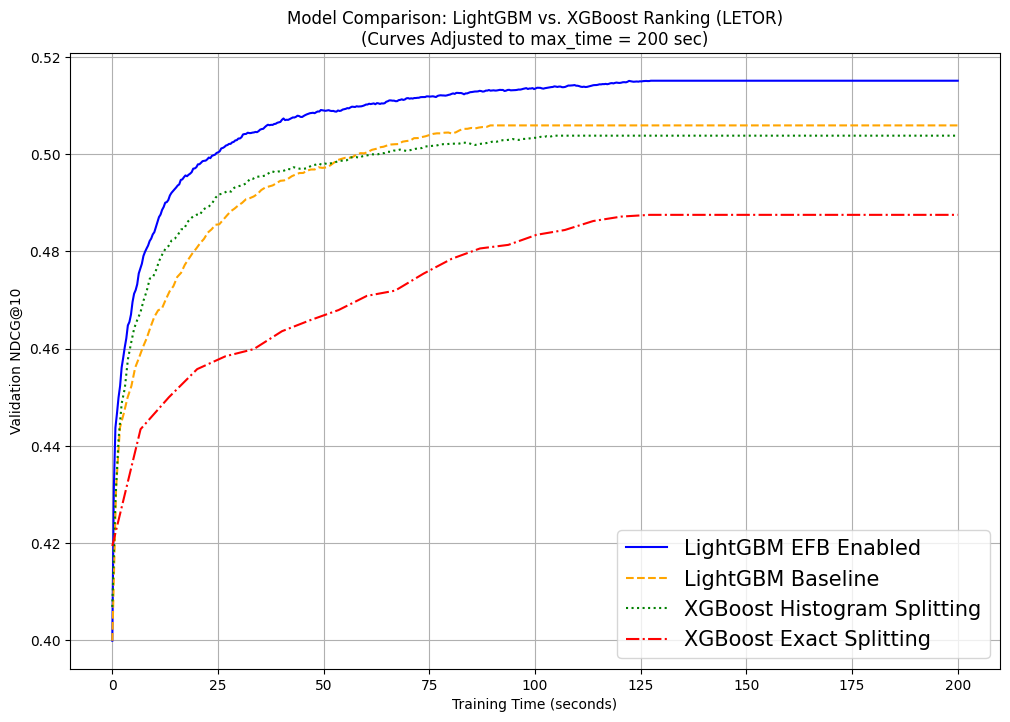

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# --- Modified Helper Function to Extend or Clip the Curve ---
def extend_or_clip_curve(time_array, metric_array, max_time, num_points=10):
    """
    Adjusts a learning curve so that it spans exactly up to max_time.
    
    If the peak metric occurs before max_time, the curve is extended by padding with a flat line 
    at the peak value until max_time.
    If the peak occurs after max_time, the curve is truncated (and interpolated) at max_time.
    
    Parameters:
      - time_array: Array of time stamps for each iteration.
      - metric_array: Array of metric values (e.g., NDCG@10).
      - max_time: The time value to which the curve should be extended/clipped.
      - num_points: Number of extra points to use for padding (only when extending).
      
    Returns:
      - adjusted_time: The adjusted time array.
      - adjusted_metric: The adjusted metric array.
    """
    peak_index = np.argmax(metric_array)
    peak_time = time_array[peak_index]
    peak_metric = metric_array[peak_index]
    
    if peak_time < max_time:
        # Extend the curve to max_time by padding with a flat line at peak_metric.
        time_up_to_peak = time_array[:peak_index+1]
        metric_up_to_peak = metric_array[:peak_index+1]
        extra_time = np.linspace(peak_time, max_time, num_points, endpoint=True)[1:]
        extra_metric = np.full_like(extra_time, peak_metric)
        adjusted_time = np.concatenate([time_up_to_peak, extra_time])
        adjusted_metric = np.concatenate([metric_up_to_peak, extra_metric])
    else:
        # Clip the curve: find indices where time <= max_time.
        valid_idx = np.where(time_array <= max_time)[0]
        if valid_idx.size == 0:
            adjusted_time = np.array([max_time])
            adjusted_metric = np.interp(max_time, time_array[:2], metric_array[:2])
        else:
            last_valid = valid_idx[-1]
            adjusted_time = time_array[:last_valid+1].copy()
            adjusted_metric = metric_array[:last_valid+1].copy()
            if adjusted_time[-1] < max_time:
                interp_metric = np.interp(max_time, time_array[last_valid:last_valid+2], metric_array[last_valid:last_valid+2])
                adjusted_time = np.concatenate([adjusted_time, [max_time]])
                adjusted_metric = np.concatenate([adjusted_metric, [interp_metric]])
    return adjusted_time, adjusted_metric

# --- Extract NDCG@10 values and generate time arrays for each model ---
# For LightGBM models:
ndcg_with_efb = np.array(evals_result_with_efb['validation']['ndcg@10'])
ndcg_without_efb = np.array(evals_result_without_efb['validation']['ndcg@10'])
time_with_efb = np.linspace(0, training_time_with_efb, len(ndcg_with_efb))
time_without_efb = np.linspace(0, training_time_without_efb, len(ndcg_without_efb))

# For XGBoost models:
ndcg_hist = np.array(evals_result_xgb_hist['validation']['ndcg@10'])
time_hist = np.linspace(0, training_time_xgb, len(ndcg_hist))
ndcg_exact = np.array(evals_result_xgb_exact['validation']['ndcg@10'])
time_exact = np.linspace(0, training_time_xgb_exact, len(ndcg_exact))

# --- Manual Control for Maximum Time ---
# Use the maximum training time among all models or set a fixed value.
manual_max_time = 200  # Adjust as needed

# Adjust curves for each model using the helper function.
ext_time_with_efb, ext_ndcg_with_efb = extend_or_clip_curve(time_with_efb, ndcg_with_efb, manual_max_time)
ext_time_without_efb, ext_ndcg_without_efb = extend_or_clip_curve(time_without_efb, ndcg_without_efb, manual_max_time)
ext_time_hist, ext_ndcg_hist = extend_or_clip_curve(time_hist, ndcg_hist, manual_max_time)
ext_time_exact, ext_ndcg_exact = extend_or_clip_curve(time_exact, ndcg_exact, manual_max_time)

# --- Combined Plot: All Four Models ---
plt.figure(figsize=(12, 8))
plt.plot(ext_time_with_efb, ext_ndcg_with_efb, label='LightGBM EFB Enabled', color='blue', linestyle='-')
plt.plot(ext_time_without_efb, ext_ndcg_without_efb, label='LightGBM Baseline', color='orange', linestyle='--')
plt.plot(ext_time_hist, ext_ndcg_hist, label='XGBoost Histogram Splitting', color='green', linestyle='dotted')
plt.plot(ext_time_exact, ext_ndcg_exact, label='XGBoost Exact Splitting', color='red', linestyle='dashdot')

plt.xlabel("Training Time (seconds)")
plt.ylabel("Validation NDCG@10")
plt.title("Model Comparison: LightGBM vs. XGBoost Ranking (LETOR)\n(Curves Adjusted to max_time = {} sec)".format(manual_max_time))
plt.legend(fontsize=15)
plt.grid(True)
plt.savefig("LETOR_3_1.png")
#plt.show()
